# Sentiment Polarity Prediction using Basic Neural Network

Equation:

y = b_gen + (w_gen1 * x1) + (w_gen2 * x2) + (w_gen3 * x3) + (w_gen4 * x4)

In [ ]:
# Use for implementation of an array.
import numpy as np
# Use for generating random dataset.
import random
# Use for plotting the progress of training using matplotlib.
# We use the "inline" option to enable interactivity later on.
%matplotlib inline
import matplotlib.pyplot as plt
# Use TensorFlow as the deep learning framework.
import tensorflow as tf
# Use pandas for read and manage training data
import pandas as pd

In [ ]:
!nvidia-smi

Thu Dec 19 15:05:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   37C    P8              3W /  160W |     953MiB /   8188MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Read training data
df = pd.read_csv("SenticNet2_Thai.txt", delimiter=",", header=None)
df.columns = ["id", "text", "Pleasantness", "Attention", "Sensitivity", "Aptitude", "Polarity"]
df.head()

,id,text,Pleasantness,Attention,Sensitivity,Aptitude,Polarity
0,1,ฉันเอง,0.00,0.15,-0.11,0.09,0.04
1,2,กล้อง,0.05,-0.09,0.00,-0.04,0.03
2,3,หยุดนิ่ง,0.00,0.18,-0.12,0.23,0.10
3,4,กำลัง,0.01,0.14,-0.10,0.15,0.06
4,5,การคาดคะเน,-0.04,0.50,-0.03,0.08,0.17


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16584 entries, 0 to 16583
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16584 non-null  int64  
 1   text          16584 non-null  object 
 2   Pleasantness  16584 non-null  float64
 3   Attention     16584 non-null  float64
 4   Sensitivity   16584 non-null  float64
 5   Aptitude      16584 non-null  float64
 6   Polarity      16584 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 907.1+ KB


In [ ]:
# Check Polarity (target) sorted
sorted(df['Polarity'].unique())

[-0.95,
 -0.94,
 -0.93,
 -0.92,
 -0.91,
 -0.9,
 -0.89,
 -0.88,
 -0.87,
 -0.86,
 -0.85,
 -0.84,
 -0.83,
 -0.82,
 -0.81,
 -0.8,
 -0.79,
 -0.78,
 -0.77,
 -0.76,
 -0.75,
 -0.74,
 -0.73,
 -0.72,
 -0.71,
 -0.7,
 -0.69,
 -0.68,
 -0.67,
 -0.65,
 -0.64,
 -0.63,
 -0.62,
 -0.61,
 -0.6,
 -0.59,
 -0.58,
 -0.57,
 -0.56,
 -0.55,
 -0.54,
 -0.53,
 -0.52,
 -0.51,
 -0.5,
 -0.49,
 -0.48,
 -0.47,
 -0.46,
 -0.45,
 -0.44,
 -0.43,
 -0.42,
 -0.41,
 -0.4,
 -0.39,
 -0.38,
 -0.37,
 -0.36,
 -0.35,
 -0.34,
 -0.33,
 -0.32,
 -0.31,
 -0.3,
 -0.29,
 -0.28,
 -0.27,
 -0.26,
 -0.25,
 -0.24,
 -0.23,
 -0.22,
 -0.21,
 -0.2,
 -0.19,
 -0.18,
 -0.17,
 -0.16,
 -0.15,
 -0.14,
 -0.13,
 -0.12,
 -0.11,
 -0.1,
 -0.09,
 -0.08,
 -0.07,
 -0.06,
 -0.05,
 -0.04,
 -0.03,
 -0.02,
 -0.01,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0

In [ ]:
# Define the number of samples/data points to generate
n_samples = len(df)
n_samples

16584

In [ ]:
# Define features (x)
x = df[df.columns.to_list()[2:-1]]
x = x.to_numpy()
x.shape

(16584, 4)

In [ ]:
# Define target (y)
y = df['Polarity']
y.shape

(16584,)

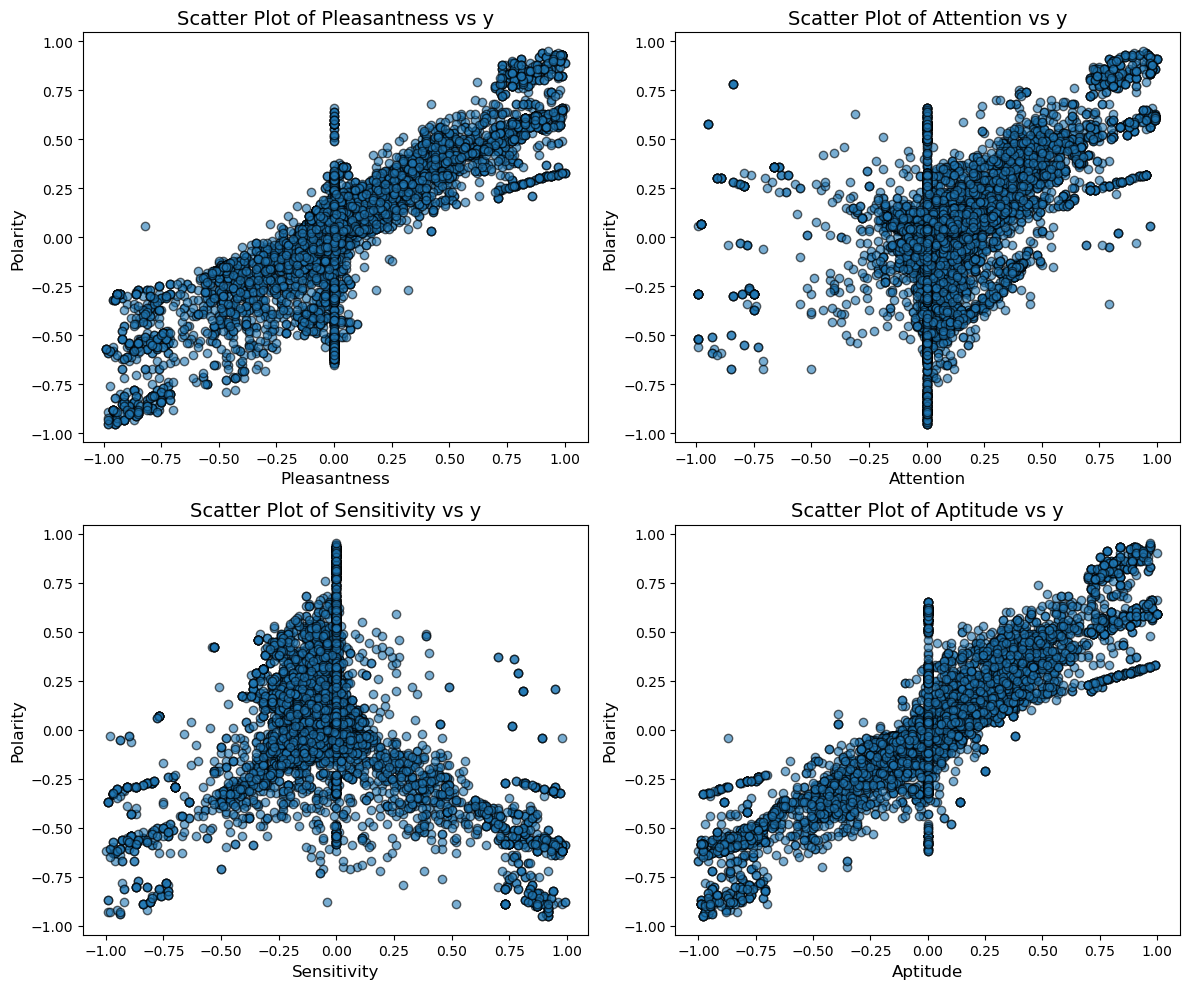

In [ ]:
# Plot correlation between features and target
plt.close()
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
feature_names = df.columns.to_list()[2:-1]

for i, ax in enumerate(axes.flatten()):
    ax.scatter(x[:, i], y, alpha=0.6, edgecolors='k')
    ax.set_xlabel(feature_names[i], fontsize=12)
    ax.set_ylabel('Polarity', fontsize=12)
    ax.set_title(f'Scatter Plot of {feature_names[i]} vs y', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# Define the TensorFlow variables based on inputs
X = tf.Variable(x, name="X")
Y = tf.Variable(y, name="Y")

# Create model variables w (weights; this is intended to map to the slope, w_gen) and b (bias; this maps to the intercept, b_gen) with correct shape.
w = tf.Variable(np.zeros(4, dtype=np.float64), name="weights") # Shape (4,)
b = tf.Variable(np.float64(0.0), name="bias") # Scalar

# Define our model. We are implementing a simple linear neuron as per the diagram shown above.
@tf.function
def forward(x):
    return tf.reduce_sum(w * x, axis=-1) + b  # sum the element-wise product w*x

In [ ]:
# Define the loss function using mean squred error.
loss_fn = tf.keras.losses.MeanSquaredError()

In [ ]:
# Define a gradient descent optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
# Define the maximum number of times we want to process the entire dataset (the number of epochs).
max_number_of_epochs = 1000

# Store information about the optimization process.
loss_array = []
b_array = []
w_array = []

# Zero out the initial values
w.assign(np.zeros(4, dtype=np.float64))
b.assign(0.0)

# Print out the parameters and loss before do any training
Y_predicted = forward(X)
loss_value = loss_fn(Y_predicted, Y)
print("Before training: w = {}, b = {:4.3f}, loss = {:7.3f}".format(w.numpy(), b.numpy(), loss_value))

print("")
print("Starting training")
print("")

# Pass in batches of the dataset
batch_size = 16
num_batches_in_epoch = (n_samples + batch_size - 1) // batch_size

# Start the training process
for i in range(max_number_of_epochs):

    for j in range(num_batches_in_epoch):
        batch_start = j * batch_size
        batch_end = min((j + 1) * batch_size, n_samples)

        with tf.GradientTape() as tape:
            y_predicted = forward(x[batch_start:batch_end])
            loss_value = loss_fn(y_predicted, y[batch_start:batch_end])

        # Calculate gradients
        gradients = tape.gradient(loss_value, [w, b])

        # Apply gradients
        optimizer.apply_gradients(zip(gradients, [w, b]))

        # Capture the data that we will use in our visualization
        w_array.append(w.numpy())
        b_array.append(b.numpy())
        loss_array.append(loss_value)

    # At the end of every epoch after the first, print out the learned weights
    if i > 0:
        avg_w = sum(w_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
        avg_b = sum(b_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
        avg_loss = sum(loss_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
        print("Epoch = {:2d}:  w = {}, b = {}, loss = {:7.3f}".format(i+1, avg_w, avg_b, avg_loss))

    # End the training when the loss function has not changed from the last epoch
    # by more than a small amount. Note that in our convergence check we will compare
    # the loss averaged over this epoch with the loss averaged over the last epoch.
    if i > 1:
        average_loss_this_epoch = sum(loss_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
        average_loss_last_epoch = sum(loss_array[(i-2)*num_batches_in_epoch:(i-1)*num_batches_in_epoch]) / num_batches_in_epoch
        if abs(average_loss_this_epoch - average_loss_last_epoch) / average_loss_last_epoch < 0.001:
            break

print("")
print("Training finished after {} epochs".format(i+1))
print("")

avg_w = sum(w_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
avg_b = sum(b_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch
avg_loss = sum(loss_array[(i-1)*num_batches_in_epoch:(i  )*num_batches_in_epoch]) / num_batches_in_epoch

print("After training:  w = {}, b = {:4.3f}, loss = {:7.3f}".format(avg_w, avg_b, avg_loss))

Before training: w = [0. 0. 0. 0.], b = 0.000, loss =   0.065

Starting training

Epoch =  2:  w = [ 0.05634677  0.03108651 -0.01222573  0.064129  ], b = 0.021485546022217528, loss =   0.047
Epoch =  3:  w = [ 0.14773897  0.07641817 -0.03111671  0.16625765], b = 0.0229983527649903, loss =   0.026
Epoch =  4:  w = [ 0.21343683  0.10643015 -0.04360894  0.23895406], b = 0.01168500303062214, loss =   0.016
Epoch =  5:  w = [ 0.26104105  0.12699169 -0.05198678  0.29141162], b = 0.0021571275423216568, loss =   0.010
Epoch =  6:  w = [ 0.29563405  0.1409832  -0.05750764  0.3293978 ], b = -0.004784106653755925, loss =   0.007
Epoch =  7:  w = [ 0.32083271  0.15031638 -0.06102622  0.35696512], b = -0.009714262595303452, loss =   0.006
Epoch =  8:  w = [ 0.33923936  0.15634592 -0.06314769  0.37702035], b = -0.013184107763547429, loss =   0.005
Epoch =  9:  w = [ 0.35273026  0.16004212 -0.06430273  0.39165571], b = -0.015606049324950305, loss =   0.005
Epoch = 10:  w = [ 0.36265904  0.16210061 -0

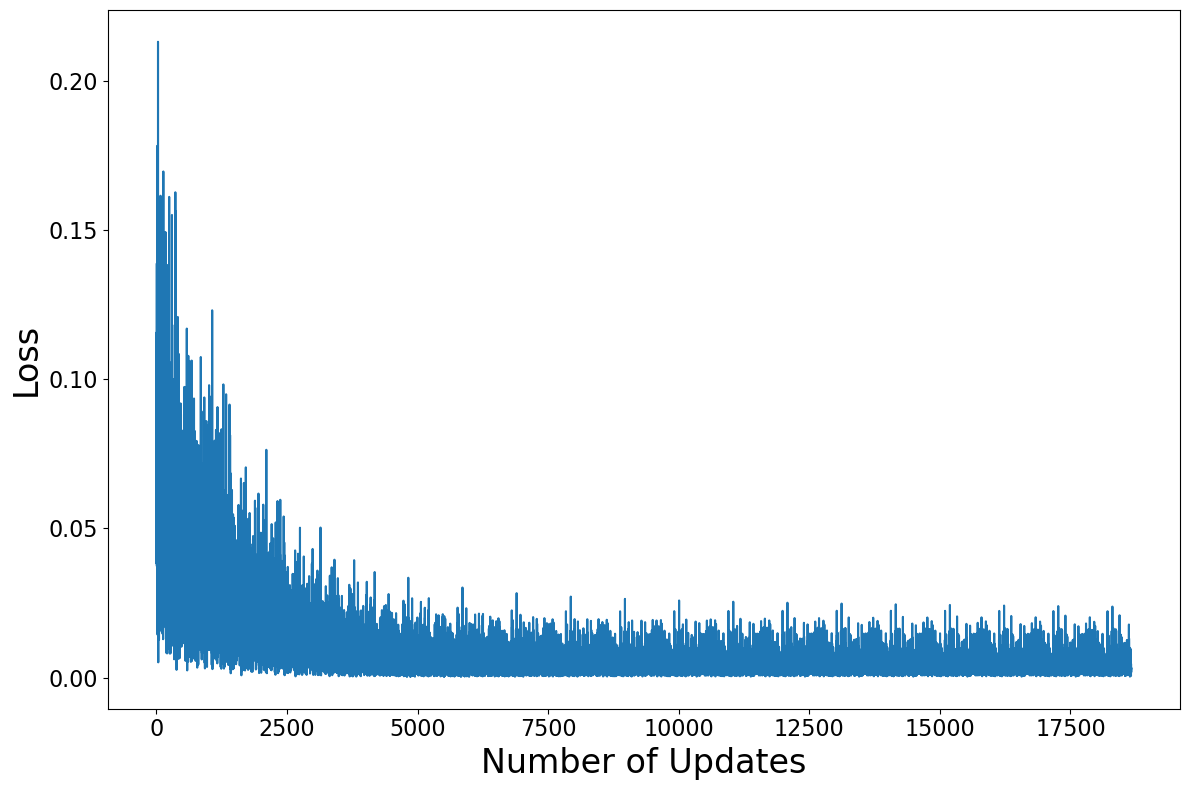

In [ ]:
# Plot loss for each number of updates
plt.close()
plt.figure(figsize=(12, 8))
plt.plot(loss_array)
plt.xlabel("Number of Updates", size=24)
plt.ylabel("Loss", size=24)
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# c=Convert list to nummpy array
w_array = np.array(w_array)
w_array[:, 0]

array([6.88500024e-05, 3.09697952e-04, 5.17902532e-04, ...,
       3.90874918e-01, 3.90874158e-01, 3.90851781e-01])

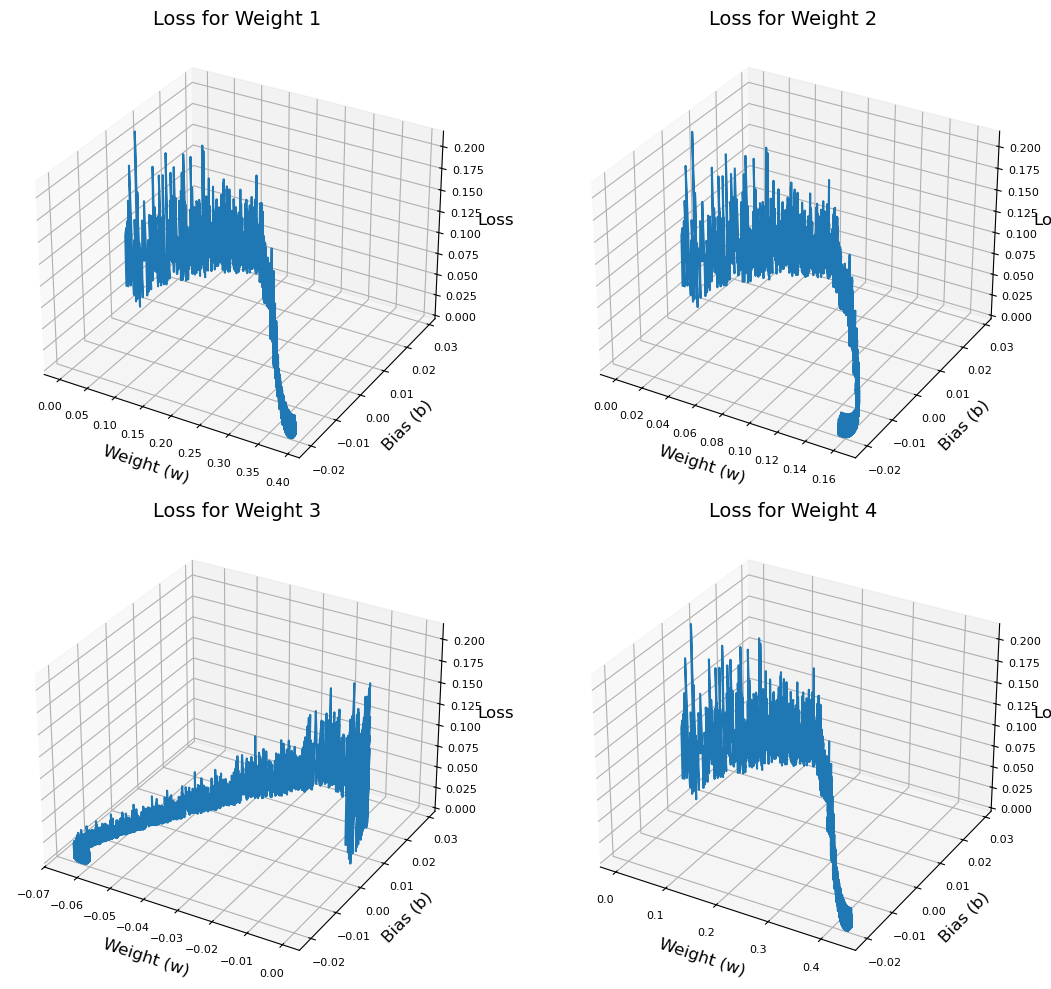

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.close()
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

for i, ax in enumerate(axes.flatten()):
    ax.plot(w_array[:, i], b_array, loss_array, label=f'Weight {i+1}')

    ax.set_xlabel('Weight (w)', size=12)
    ax.set_ylabel('Bias (b)', size=12)
    ax.set_zlabel('Loss', size=12)

    ax.tick_params(labelsize=8)
    ax.set_title(f'Loss for Weight {i+1}', size=14)

plt.tight_layout()
plt.show()

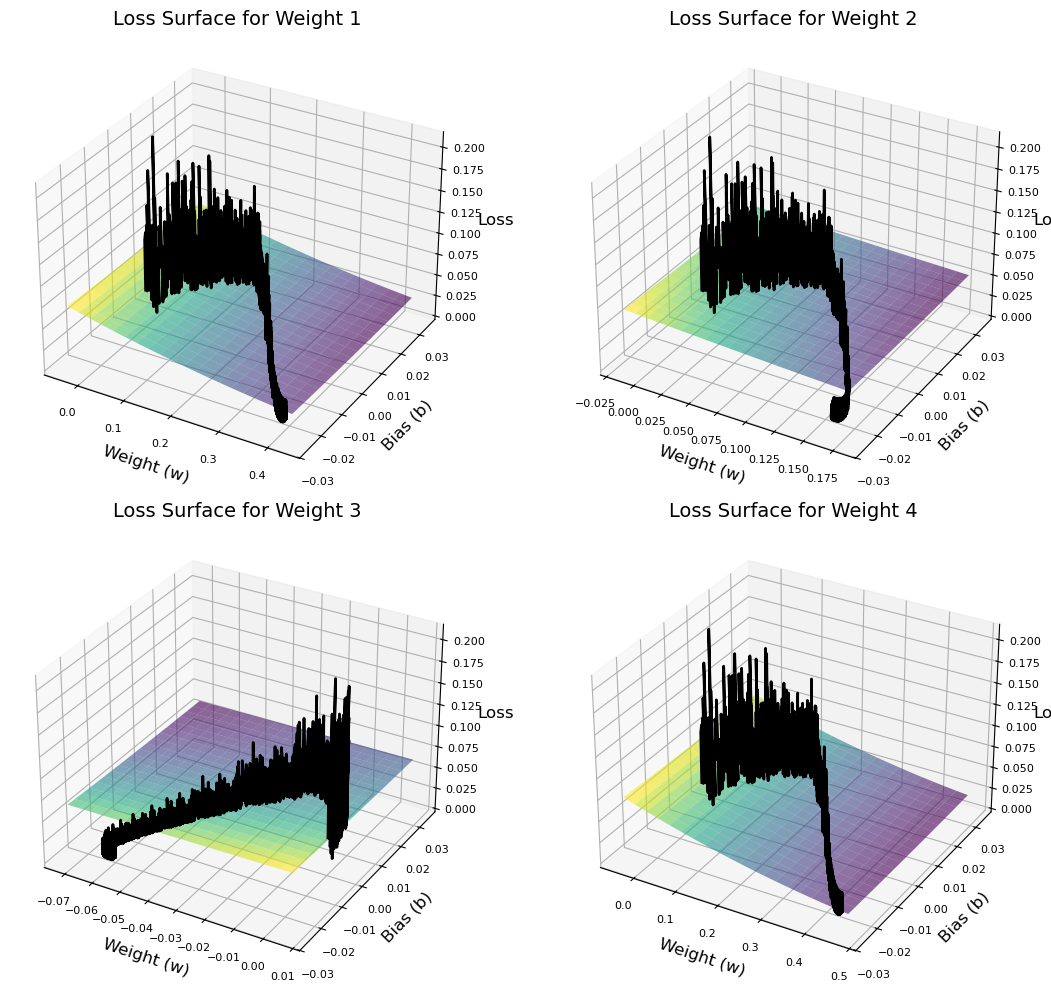

In [ ]:
# Initialize lists to store surface data for each weight dimension
loss_surfaces = []
w_surfaces = []
b_surfaces = []

# Create 4 sets of surface data, one for each weight dimension
for dim in range(4):
    # Extract the range for this dimension from w_array
    w_min, w_max = np.min(w_array[:, dim]), np.max(w_array[:, dim])
    b_min, b_max = np.min(b_array), np.max(b_array)

    # Create mesh grid points with slightly expanded range
    w_margin = (w_max - w_min) * 0.1  # 10% margin
    b_margin = (b_max - b_min) * 0.1  # 10% margin

    w_values = np.linspace(w_min - w_margin, w_max + w_margin, 20)
    b_values = np.linspace(b_min - b_margin, b_max + b_margin, 20)
    W, B = np.meshgrid(w_values, b_values)

    loss_surface = np.zeros_like(W)

    # Calculate loss for each point in the grid
    for i in range(len(b_values)):
        for j in range(len(w_values)):
            # Create a weight vector with zeros except for the current dimension
            w_vec = np.zeros(4)
            w_vec[dim] = W[i, j]

            # Assign values
            w.assign(w_vec)
            b.assign(B[i, j])

            # Calculate loss
            Y_predicted = forward(X)
            loss_value = loss_fn(Y_predicted, Y)

            # Store value in the grid
            loss_surface[i, j] = loss_value

    # Store the grid data
    loss_surfaces.append(loss_surface)
    w_surfaces.append(W)
    b_surfaces.append(B)

# Create subplots
plt.close()
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Plot each surface in its own subplot
for i, ax in enumerate(axes.flatten()):
    # Plot surface
    surf = ax.plot_surface(w_surfaces[i], b_surfaces[i], loss_surfaces[i],
                          cmap='viridis', alpha=0.6)

    # Plot optimization trajectory
    ax.plot(w_array[:, i], b_array, loss_array,
            color='black',
            linewidth=2,
            zorder=10)

    ax.set_xlabel('Weight (w)', size=12)
    ax.set_ylabel('Bias (b)', size=12)
    ax.set_zlabel('Loss', size=12)

    ax.tick_params(labelsize=8)
    ax.set_title(f'Loss Surface for Weight {i+1}', size=14)

plt.tight_layout()
plt.show()

***Conclusion***

After training:

- w = [ 0.38937772  0.15762701 -0.06125318  0.43095389], b = -0.020, loss =   0.004

y = b_gen + (w_gen1 * x1) + (w_gen2 * x2) + (w_gen3 * x3) + (w_gen4 * x4) should be

- y = -0.020 + (0.38937772 * Pleasantness) + (0.15762701 * Attention) + (-0.06125318 * Sensitivity) + (0.43095389 * Aptitude)

***Web App for Sentiment Polarity Prediction***

In [ ]:
!pip install pythainlp

***Reference for pos_tag***
https://pythainlp.org/dev-docs/api/tag.html

Filter only VERB, ADV, NCMN and ADJ

***Example Output***
![Example Output](https://drive.google.com/uc?export=view&id=16U8b0GwlKvW39dMj93SC7wnYjKKM59Ty)

In [ ]:
from pythainlp.tokenize import word_tokenize
from pythainlp.tag import pos_tag
import pandas as pd
import numpy as np

def aggregate_word_scores(sentiment_result):
    # Calculate aggregate word scores to sentence score by using average method
    if sentiment_result and len(sentiment_result) > 0:
        avg_word_score = np.array(sentiment_result).sum() / len(sentiment_result)
    else:
        avg_word_score = 0
    return avg_word_score


def analysis_sentiment(text):
    # Read data
    db = pd.read_csv("SenticNet2_Thai.txt", delimiter=",", header=None)
    db.columns = ["id", "text", "Pleasantness", "Attention", "Sensitivity", "Aptitude", "Polarity"]

    token_list = word_tokenize(text)    # Split word
    pos_list = pos_tag(token_list)  # Tag part-of-speech

    # Filter only VERB, ADV, NCMN and ADJ
    filtered_list = []
    for token in pos_list:
        if token[1] == 'VERB' or token[1] == 'ADV' or token[1] == 'NCMN' or token[1] == 'ADJ':
            filtered_list.append(token[0])

    sentiment_list = []
    for word in filtered_list:
        # Filter word
        filtered_data = db[db['text']==word]
        if not filtered_data.empty:
            seg = filtered_data[["Pleasantness", "Attention", "Sensitivity", "Aptitude"]]

            # From training, we got y = -0.020 + (0.38937772 * Pleasantness) + (0.15762701 * Attention) + (-0.06125318 * Sensitivity) + (0.43095389 * Aptitude)
            polarity = -0.020 + (0.38937772 * seg['Pleasantness'].iloc[0]) + (0.15762701 * seg['Attention'].iloc[0]) + (-0.06125318 * seg['Sensitivity'].iloc[0]) + (0.43095389 * seg['Aptitude'].iloc[0])
            sentiment_list.append(polarity)
        else:
            sentiment_list.append('not found')


    # Count the occurrences of each sentiment
    sentiment_result = [sentiment for sentiment in sentiment_list if sentiment != 'not found']    # Remove all 'not found' from list
    sentiment_scores = aggregate_word_scores(sentiment_result)

    # If sentiment_scores > 0 sentiment should be positive, polarity < 0 sentiment should be negative else should be neutral
    if sentiment_scores > 0:
        sentimetn_polarity = 'positive'
    elif sentiment_scores < 0:
        sentimetn_polarity = 'negative'
    else:
        sentimetn_polarity = 'neutral'

    return sentimetn_polarity, filtered_list, sentiment_list


In [ ]:
import gradio as gr

# Function to process input
def process_input(input_text):
    sentimetn_polarity, filtered_list, sentiment_list = analysis_sentiment(input_text)

    # Format the output string
    output_label = f"""
Sentiment of Sentence: {sentimetn_polarity}

Important Words:
- {', '.join(filtered_list)}

Sentiment of Each Word:
"""
    # Build the word-sentiment list
    for word, sentiment in zip(filtered_list, sentiment_list):
        output_label += f"- {word}: {sentiment}\n"

    return output_label.strip()

# Create Gradio interface
iface = gr.Interface(
    fn=process_input,           # The function to process input
    inputs=gr.Textbox(label="Input Text"),   # Textbox for user input
    outputs=gr.Textbox(label="Output"),     # Use a Textbox for multiline output
    live=False,                 # Compute when the button is clicked (not live update)
    allow_flagging="never"      # Disable flagging
)

# Launch the interface
iface.launch()

c:\Users\User\anaconda3\envs\myenv\Lib\site-packages\gradio\interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
